**Modelo de Predição para Bolsa de Valores** 



**Instala a biblioteca yfinance** 


In [78]:
pip install yfinance

**Importa as Bibliotecas**

In [79]:
import yfinance as yf
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
import pandas_datareader.data as web
yf.pdr_override()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



**Importa os DataSet da base do Yahoo Finance**

In [80]:
Base1 = web.get_data_yahoo('SMAL11.SA', start="2018-01-01", end="2020-01-01")


[*********************100%***********************]  1 of 1 completed


In [81]:
Base1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,81.199997,81.680000,80.500000,81.500000,81.500000,21310
2018-01-03,81.500000,82.000000,81.320000,81.650002,81.650002,17520
2018-01-04,81.989998,82.099998,81.750000,81.750000,81.750000,18400
2018-01-05,82.489998,82.500000,81.489998,81.900002,81.900002,27090
2018-01-08,82.500000,82.500000,81.690002,81.900002,81.900002,11040
...,...,...,...,...,...,...
2019-12-20,133.009995,133.940002,131.779999,133.199997,133.199997,380090
2019-12-23,133.229996,134.750000,133.070007,134.580002,134.580002,244670
2019-12-26,135.009995,137.970001,135.009995,136.809998,136.809998,472680


**Análise dos** **dados** 

In [82]:
Base1.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


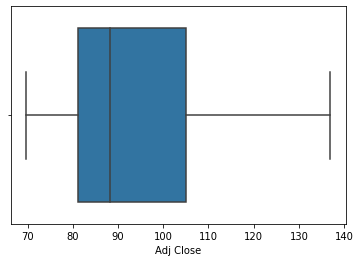

In [83]:
import seaborn as sns
sns.boxplot(Base1['Adj Close'])

In [84]:
Base1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02
mean,92.260486,92.896579,91.389980,92.161903,92.161903,1.173735e+05
std,15.198077,15.313497,15.159625,15.316944,15.316944,1.742229e+05
min,69.830002,71.000000,68.930000,69.650002,69.650002,0.000000e+00
25%,81.055002,81.992498,80.500000,81.094997,81.094997,1.597500e+04
50%,87.885002,89.385002,87.384998,88.299999,88.299999,4.767000e+04
75%,104.517498,105.827497,103.972498,105.137501,105.137501,1.414600e+05
max,137.800003,137.970001,136.240005,136.949997,136.949997,1.633300e+06


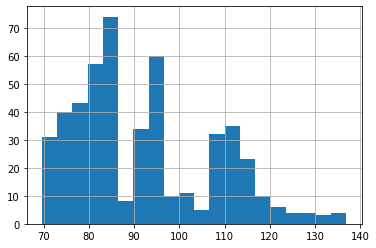

In [85]:
Base1['Adj Close'].hist(bins=20)
plt.show()

In [86]:
Base1_Close = Base1['Adj Close']

In [87]:
Base1_Close.isnull().values.any()

False

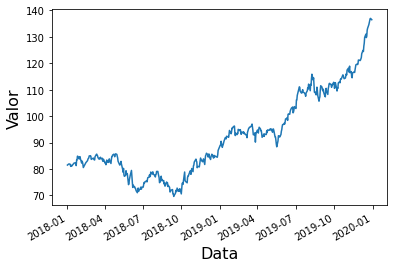

In [88]:
Base1_Close.plot()
plt.xlabel('Data', size=16)
plt.ylabel('Valor', size=16)
plt.show()

**Cria um Data Frame**

In [89]:
Base1_DFrame = pd.DataFrame(Base1_Close)
Base1_DFrame

,Adj Close
Date,
2018-01-02,81.500000
2018-01-03,81.650002
2018-01-04,81.750000
2018-01-05,81.900002
2018-01-08,81.900002
...,...
2019-12-20,133.199997
2019-12-23,134.580002
2019-12-26,136.809998


In [90]:
type(Base1_DFrame)

pandas.core.frame.DataFrame

In [91]:
Base1_DFrame = Base1_DFrame.reset_index('Date')

**Altera os nomes das colunas para serem usadas no PROPHET**

In [92]:
Base1_DFrame.columns = ['ds', 'y']

In [93]:
Base1_DFrame

,ds,y
0,2018-01-02,81.500000
1,2018-01-03,81.650002
2,2018-01-04,81.750000
3,2018-01-05,81.900002
4,2018-01-08,81.900002
...,...,...
489,2019-12-20,133.199997
490,2019-12-23,134.580002
491,2019-12-26,136.809998
492,2019-12-27,136.949997


**Divide o DataFrame em Base de Treino e Teste**

In [94]:
d_train, d_test = train_test_split(Base1_DFrame, test_size=0.3, shuffle=False)

In [95]:
d_train

,ds,y
0,2018-01-02,81.500000
1,2018-01-03,81.650002
2,2018-01-04,81.750000
3,2018-01-05,81.900002
4,2018-01-08,81.900002
...,...,...
340,2019-05-21,92.599998
341,2019-05-22,92.510002
342,2019-05-23,92.349998
343,2019-05-24,92.080002


In [96]:
d_test

,ds,y
345,2019-05-28,94.250000
346,2019-05-29,94.900002
347,2019-05-30,96.099998
348,2019-05-31,96.800003
349,2019-06-03,96.900002
...,...,...
489,2019-12-20,133.199997
490,2019-12-23,134.580002
491,2019-12-26,136.809998
492,2019-12-27,136.949997


**Executa o treinamento com PROPHET utilizando dados de Treino e exibe o Forecast**

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


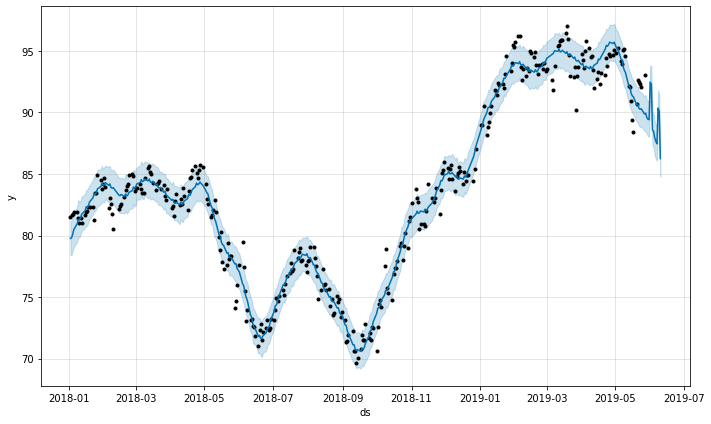

In [97]:
modelo = Prophet(n_changepoints=20, yearly_seasonality=12, weekly_seasonality=4) 
modelo.fit(d_train); 
future = modelo.make_future_dataframe(periods=14) 
forecast = modelo.predict(future) 
figure=modelo.plot(forecast)  

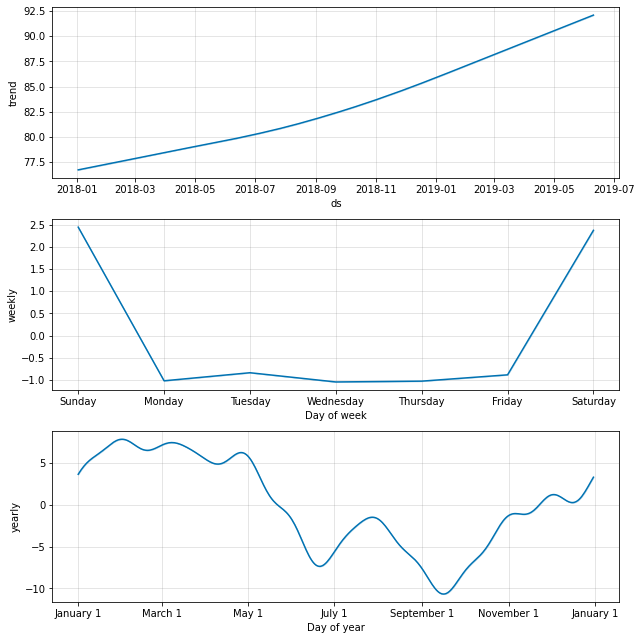

In [98]:
modelo.plot_components(forecast)
plt.show()

**Exibe o Forecast com os Changes Points identificados**

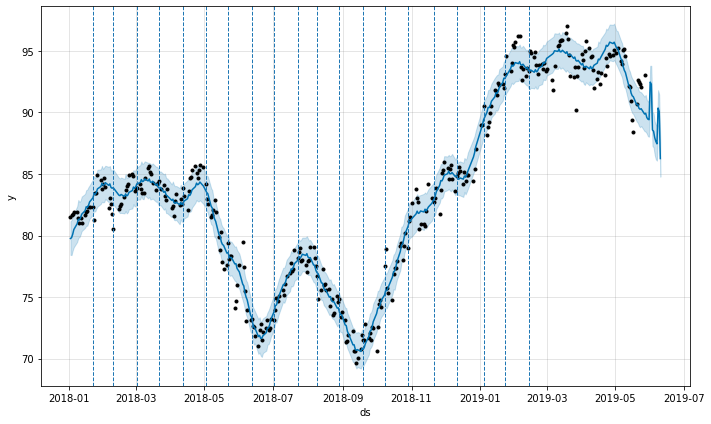

In [99]:
figure = modelo.plot(forecast)
for changepoint in modelo.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

**Executa o treinamento com PROPHET utilizando dados de Teste e exibe o Forecast**

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


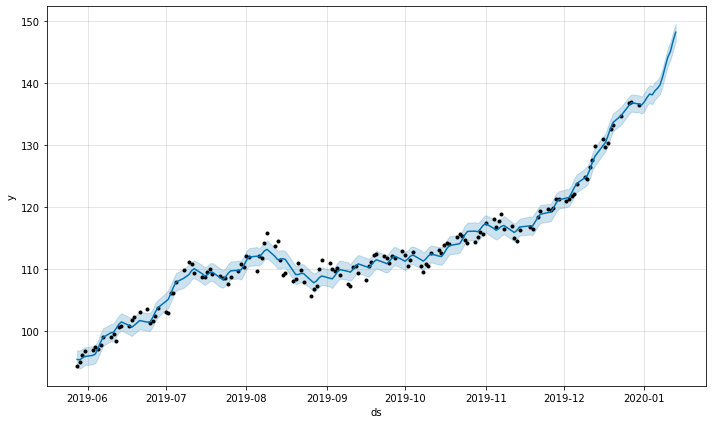

In [100]:
modelo = Prophet(n_changepoints=20, yearly_seasonality=12, weekly_seasonality=4)
modelo.fit(d_test);
future = modelo.make_future_dataframe(periods=14) 
forecast = modelo.predict(future)
figure=modelo.plot(forecast)


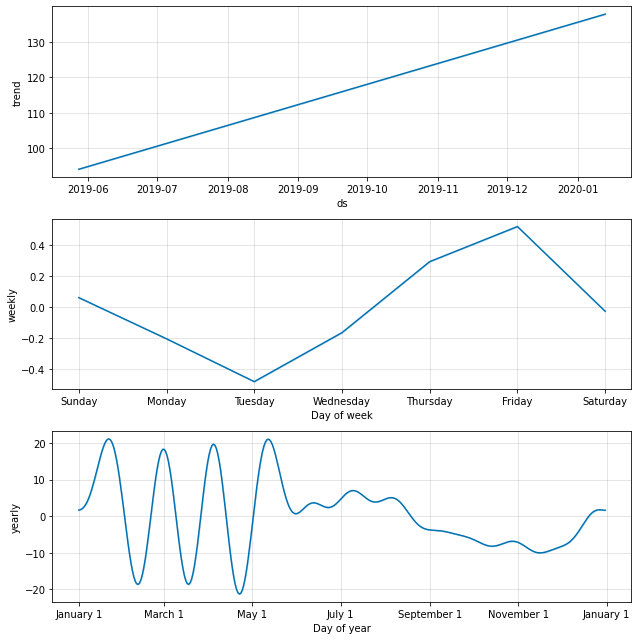

In [101]:
modelo.plot_components(forecast)
plt.show()

**Exibe o Forecast gerado utilizando os dados de Teste com os Changes Points identificados**

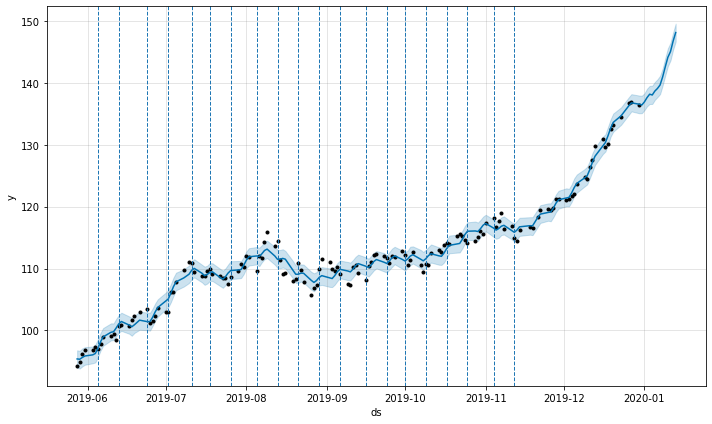

In [64]:
figure = modelo.plot(forecast)
for changepoint in modelo.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

In [65]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-05-28,94.073013,93.962591,96.772898,94.073013,94.073013,1.305907,1.305907,1.305907,-0.479687,-0.479687,-0.479687,1.785594,1.785594,1.785594,0.0,0.0,0.0,95.378920
1,2019-05-29,94.263001,93.823337,96.690489,94.263001,94.263001,1.065584,1.065584,1.065584,-0.164140,-0.164140,-0.164140,1.229725,1.229725,1.229725,0.0,0.0,0.0,95.328585
2,2019-05-30,94.452989,94.176467,97.087160,94.452989,94.452989,1.164058,1.164058,1.164058,0.293193,0.293193,0.293193,0.870865,0.870865,0.870865,0.0,0.0,0.0,95.617047
3,2019-05-31,94.642978,94.442473,97.284255,94.642978,94.642978,1.213177,1.213177,1.213177,0.519191,0.519191,0.519191,0.693987,0.693987,0.693987,0.0,0.0,0.0,95.856155
4,2019-06-03,95.212943,94.679102,97.385659,95.212943,95.212943,0.825612,0.825612,0.825612,-0.203599,-0.203599,-0.203599,1.029212,1.029212,1.029212,0.0,0.0,0.0,96.038555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,2020-01-09,137.010368,141.213665,144.025589,137.010368,137.010368,5.596979,5.596979,5.596979,0.293193,0.293193,0.293193,5.303785,5.303785,5.303785,0.0,0.0,0.0,142.607346
159,2020-01-10,137.200356,142.726854,145.608033,137.200356,137.200356,6.950996,6.950996,6.950996,0.519191,0.519191,0.519191,6.431806,6.431806,6.431806,0.0,0.0,0.0,144.151352
160,2020-01-11,137.390344,143.647746,146.488309,137.390344,137.390344,7.676519,7.676519,7.676519,-0.026408,-0.026408,-0.026408,7.702927,7.702927,7.702927,0.0,0.0,0.0,145.066863
161,2020-01-12,137.580333,145.359855,148.125858,137.580332,137.580333,9.157926,9.157926,9.157926,0.061451,0.061451,0.061451,9.096475,9.096475,9.096475,0.0,0.0,0.0,146.738258


**Prepara os dados para avaliar o modelo**

In [66]:
prev2 = modelo.predict( pd.DataFrame(d_test['ds'] ) )

In [67]:
prev2['yhat']

0       95.378920
1       95.328585
2       95.617047
3       95.856155
4       96.038555
          ...    
144    133.628074
145    134.683475
146    136.314523
147    136.786036
148    136.568255
Name: yhat, Length: 149, dtype: float64

In [68]:
y_prev = prev2['yhat'].values
y_true = d_test['y'].values

**Executa a função que informa o erro encontrado**

In [69]:
mean_squared_error(y_true, y_prev)

1.28484394505906

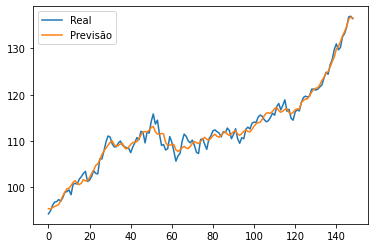

In [70]:
plt.plot(y_true, label='Real')
plt.plot(y_prev, label='Previsão')
plt.legend()

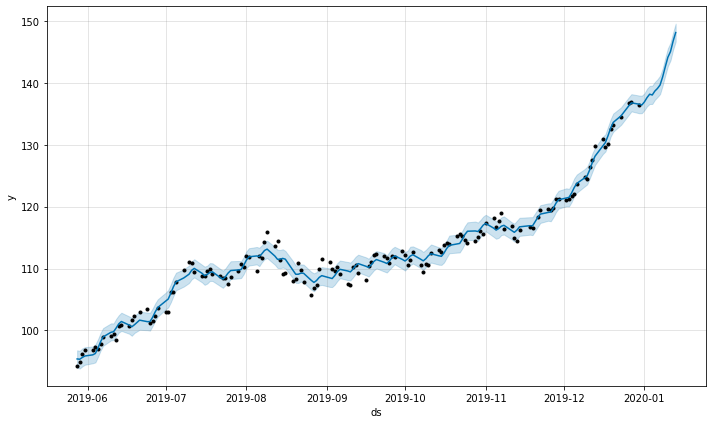

In [71]:
figure=modelo.plot(forecast)


**Validando o modelo utlizando uma base operacional.**

> Abaixo vamos gerar a Base de testes incluindo a base operacional com os valores reais de dias futuros para confrontar com o Forecast.





In [72]:
Base2 = web.get_data_yahoo('SMAL11.SA', start="2020-01-01", end="2020-01-22")

[*********************100%***********************]  1 of 1 completed


In [73]:
Base2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,138.000000,139.500000,138.000000,139.500000,139.500000,631240
2020-01-03,138.000000,140.899994,137.130005,140.899994,140.899994,401120
2020-01-06,139.000000,139.660004,137.000000,139.100006,139.100006,418470
2020-01-07,139.500000,139.710007,138.179993,139.399994,139.399994,160520
2020-01-08,139.410004,139.789993,137.699997,138.199997,138.199997,555410
2020-01-09,138.720001,139.589996,138.490005,138.800003,138.800003,1060820
2020-01-10,139.990005,140.910004,138.949997,139.399994,139.399994,1023080
2020-01-13,139.809998,141.899994,139.809998,141.899994,141.899994,564260
2020-01-14,141.770004,143.199997,141.169998,143.199997,143.199997,272920


In [74]:
prev3 = modelo.predict( pd.DataFrame(forecast['ds'].iloc[149:163]) )
prev3['yhat']

0     136.445931
1     136.945463
2     137.641509
3     138.185386
4     138.060102
5     138.691649
6     139.111128
7     139.673333
8     140.988334
9     142.607346
10    144.151352
11    145.066863
12    146.738258
13    148.151222
Name: yhat, dtype: float64

In [75]:
y_prev = prev3['yhat'].values
y_true = Base2['Adj Close'].values

**Executa a função MSE que informa o erro encontrado no período de 14 dias futuros.**

In [76]:
mean_squared_error(y_true, y_prev)

4.433616666307833

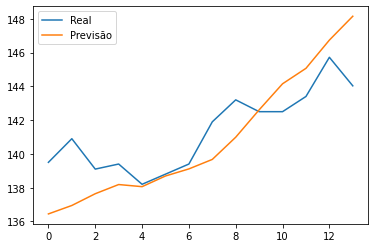

In [77]:
plt.plot(y_true, label='Real')
plt.plot(y_prev, label='Previsão')
plt.legend()